In [134]:
import numpy as np
import pandas as pd
from kmodes.kprototypes import KPrototypes
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [115]:
df = pd.read_csv('seg_rfm.csv') 

In [116]:
scaler = MinMaxScaler()

df_scale = scaler.fit_transform(df[['Recence', 'Frequence', 'Montant']])

In [117]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, random_state=0)
    km = km.fit(df_scale)
    Sum_of_squared_distances.append(km.inertia_)

/home/apprenant/miniconda3/envs/machinlearn/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/apprenant/miniconda3/envs/machinlearn/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/apprenant/miniconda3/envs/machinlearn/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/apprenant/miniconda3/envs/machinlearn/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

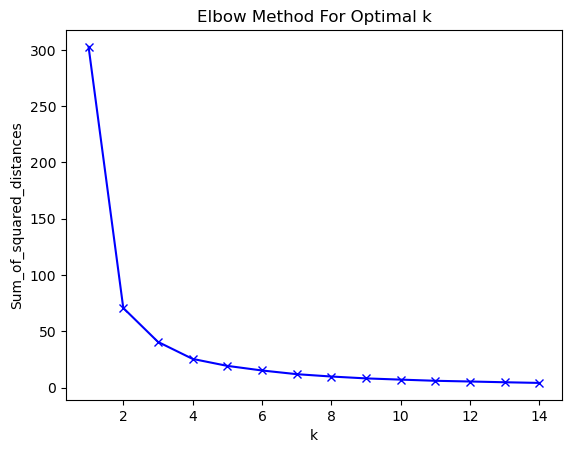

In [118]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


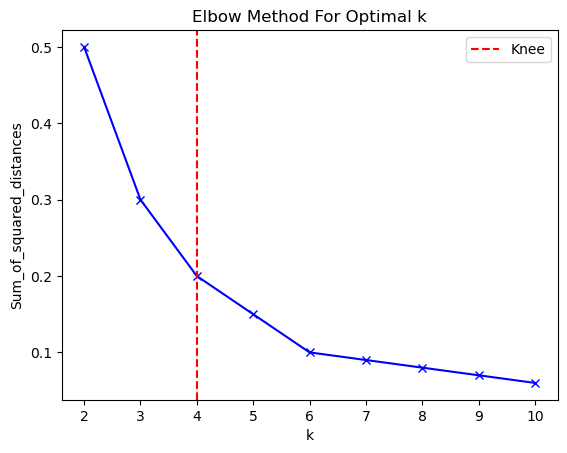

Valeur de k coude : 4


In [119]:
import numpy as np
from kneed import KneeLocator
import matplotlib.pyplot as plt

K = [2, 3, 4, 5, 6, 7, 8, 9, 10]
Sum_of_squared_distances = [0.5, 0.3, 0.2, 0.15, 0.1, 0.09, 0.08, 0.07, 0.06]

x = np.array(K)
y = np.array(Sum_of_squared_distances)

kneedle = KneeLocator(x, y, curve='convex', direction='decreasing')
k_value = kneedle.knee

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.axvline(x=k_value, color='r', linestyle='--', label='Knee')
plt.legend()
plt.show()

print("Valeur de k coude :", k_value)


In [120]:
optimal_n = 4
kmeans = KMeans(n_clusters=optimal_n, random_state=0)
clusters = kmeans.fit_predict(df_scale)

df['Cluster'] = clusters


/home/apprenant/miniconda3/envs/machinlearn/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


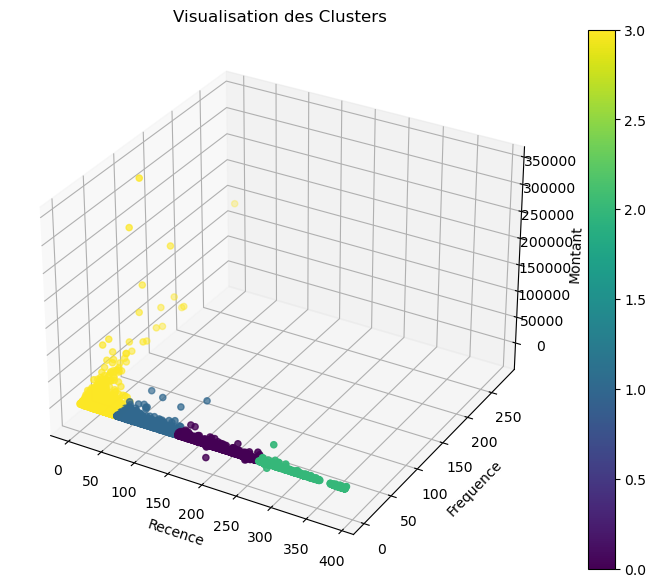

In [121]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['Recence'], df['Frequence'], df['Montant'], c=df['Cluster'], cmap='viridis')

ax.set_title('Visualisation des Clusters')
ax.set_xlabel('Recence')
ax.set_ylabel('Frequence')
ax.set_zlabel('Montant')

plt.colorbar(scatter)
plt.show()


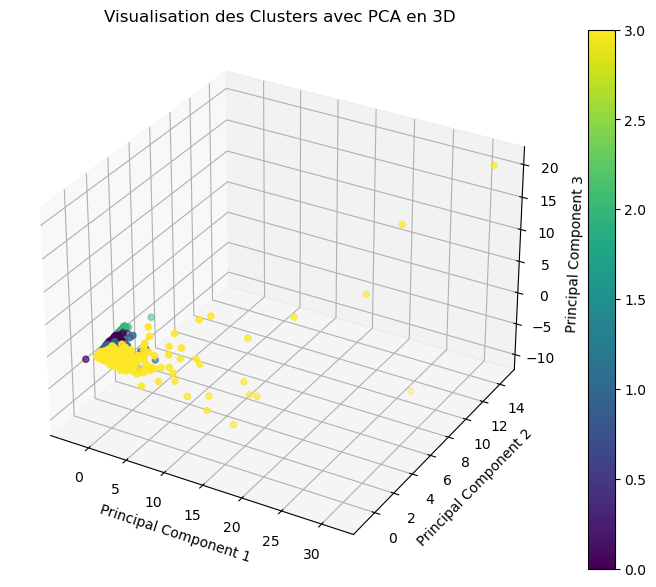

In [122]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Sélectionnez uniquement les colonnes numériques pour l'ACP
num_cols = ['Recence', 'Frequence', 'Montant']
data_num = df[num_cols]

# Normalisez les données
data_num = (data_num - data_num.mean()) / data_num.std()

# Faites une ACP avec 3 composantes principales
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(data_num)

df_principal = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
df_principal['Cluster'] = df['Cluster']

# Visualisation en 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df_principal['principal component 1'], df_principal['principal component 2'], df_principal['principal component 3'], c=df_principal['Cluster'], cmap='viridis')

ax.set_title('Visualisation des Clusters avec PCA en 3D')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.colorbar(scatter)
plt.show()


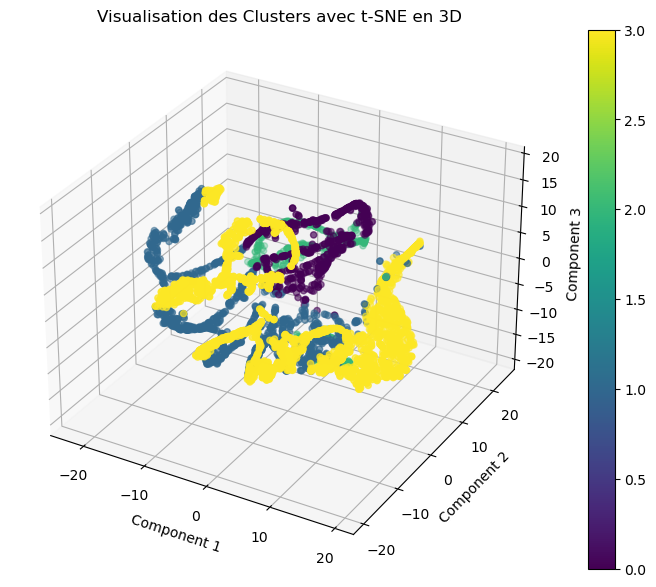

In [123]:
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

num_cols = ['Recence', 'Frequence', 'Montant']
data_num = df[num_cols]

data_num = (data_num - data_num.mean()) / data_num.std()

tsne = TSNE(n_components=3, random_state=42)
data_tsne = tsne.fit_transform(data_num)

df_tsne = pd.DataFrame(data = data_tsne, columns = ['Component 1', 'Component 2', 'Component 3'])
df_tsne['Cluster'] = df['Cluster']

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df_tsne['Component 1'], df_tsne['Component 2'], df_tsne['Component 3'], c=df_tsne['Cluster'], cmap='viridis')

ax.set_title('Visualisation des Clusters avec t-SNE en 3D')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

plt.colorbar(scatter)
plt.show()


## K PROTO


In [ ]:

num_columns = ['TotalSale', 'Recence', 'Frequence', 'Montant', 'Nb_Annulations', 'Total_Commandes', 'Montant_Annule', 'Total_depense']
cat_columns = ['Country']

scaler = MinMaxScaler()
df[num_columns] = scaler.fit_transform(df[num_columns])

df[cat_columns] = df[cat_columns].astype(str)

num_clusters = 4


kproto = KPrototypes(n_clusters=num_clusters, init='Cao', verbose=2)
clusters = kproto.fit_predict(df, categorical=[df.columns.get_loc(col) for col in cat_columns])

df['Cluster'] = clusters


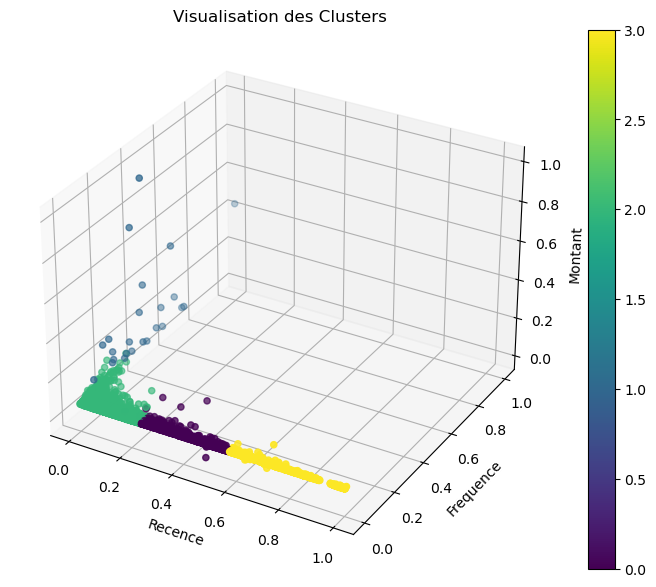

In [146]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['Recence'], df['Frequence'], df['Montant'], c=df['Cluster'], cmap='viridis')

ax.set_title('Visualisation des Clusters')
ax.set_xlabel('Recence')
ax.set_ylabel('Frequence')
ax.set_zlabel('Montant')

plt.colorbar(scatter)
plt.show()


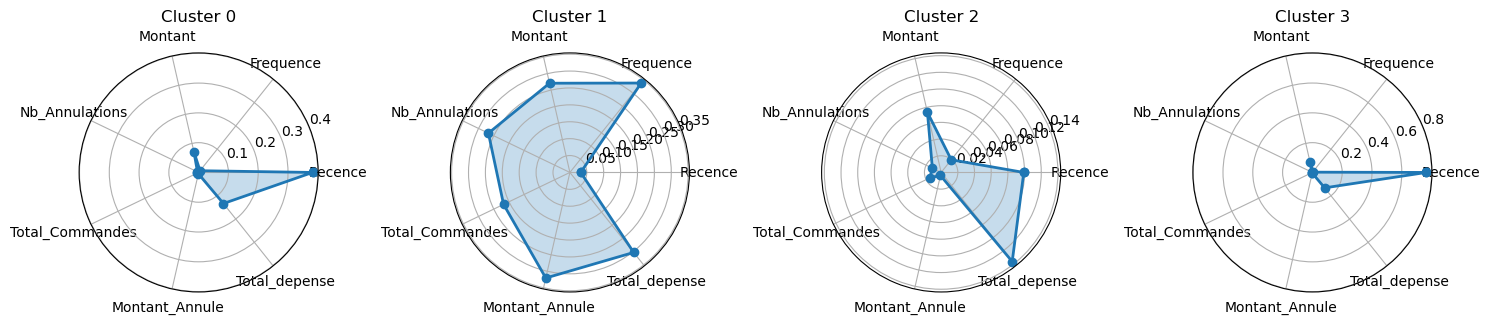

In [158]:
caracteristiques = ['Recence', 'Frequence', 'Montant', 'Nb_Annulations', 'Total_Commandes', 'Montant_Annule', 'Total_depense']

means = df.groupby('Cluster')[caracteristiques].mean()

angles = np.linspace(0, 2 * np.pi, len(caracteristiques), endpoint=False).tolist()
angles += angles[:1]

fig, axes = plt.subplots(nrows=1, ncols=num_clusters, figsize=(15, 10), subplot_kw=dict(polar=True))

for cluster, ax in zip(range(num_clusters), axes):
    ax.plot(angles, means.loc[cluster].values.tolist() + means.loc[cluster].values.tolist()[:1], 'o-', linewidth=2)
    ax.fill(angles, means.loc[cluster].values.tolist() + means.loc[cluster].values.tolist()[:1], alpha=0.25)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(caracteristiques)
    ax.set_title(f'Cluster {cluster}')
    ax.grid(True)

plt.tight_layout()

plt.show()
